In [21]:
import h5py
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse

import pyrenn
from numpy import linalg as LA
import random
from sklearn.metrics import r2_score as r2
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from sklearn import tree

In [22]:
xtcav=False     

X=pd.read_hdf('xfel_data.h5.h5',key='df')
X_features=[]
for each in X.columns:
    if each=='intensity_photon_energy_0':
        break
    X_features.append(each)
    
X=X.loc[:,X_features]
X=X.drop(['experiment_id'],axis=1)
 
if xtcav==True:          ###read xtcav if it is set to true
    X2=pd.read_hdf('xfel_data.h5', key='xtcav')
    X2=X2.drop(['ids','exist'],axis=1)
    X=np.asarray(X.join(X2).values).astype(float)
else:
    X=np.asarray(X.values).astype(float)

X=np.asarray(X.values).astype(float)
z=pd.read_hdf('xfel_data.h5.h5',key='new')


Mean_pe R2: 0.0106 RMSE: 37.6


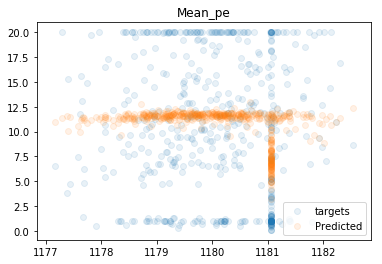

Sigma_pe R2: 0.362 RMSE: 16.3


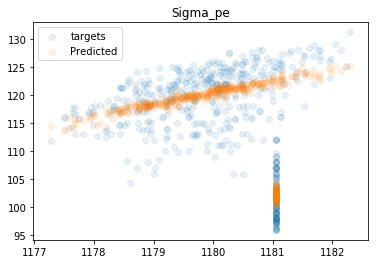

CenterOfMass_pe R2: 0.415 RMSE: 12.0


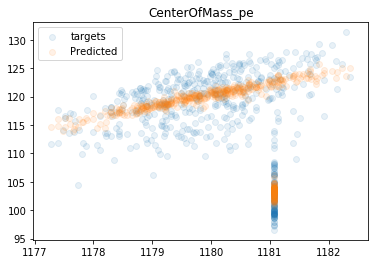

ArgMax_pe R2: 0.191 RMSE: 42.3


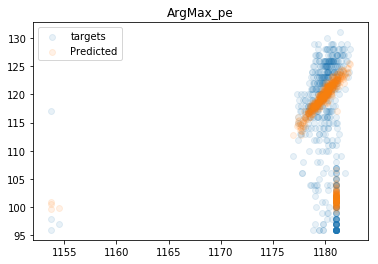

Scaling_pe R2: 0.0798 RMSE: 2.7e+02


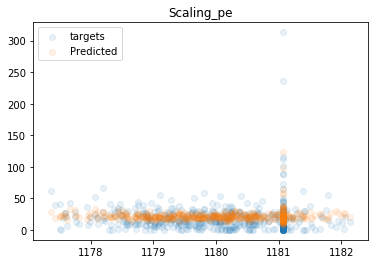

CenterOfMass_it R2: 0.0181 RMSE: 0.908


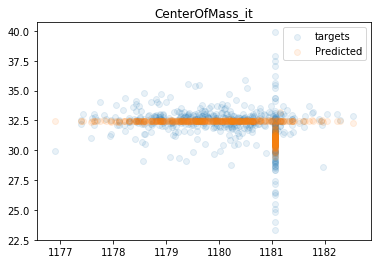

ArgMax_it R2: -0.0106 RMSE: 9.56


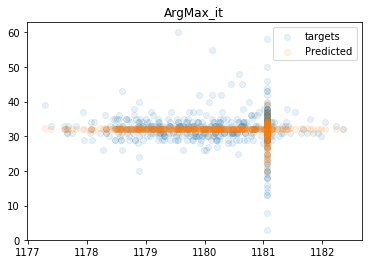

Mean_it R2: 0.747 RMSE: 0.293


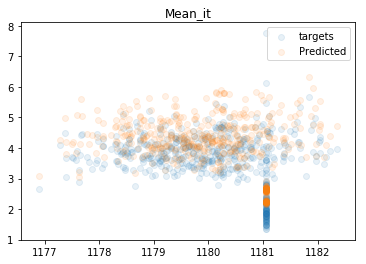

In [23]:
for cur_column in z.columns:
    y=np.asarray(z.loc[:,cur_column].values).astype(float)
    kf = KFold(n_splits=2, shuffle =True)
    r2_scores=[]
    mse_scores=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf =GradientBoostingRegressor()
        clf = clf.fit(X_train, y_train.ravel())
        yhat=clf.predict(X_test)
        r2_scores.append(r2(y_test.ravel(),yhat))
        mse_scores.append(mse(y_test.ravel(),yhat))
    r2_scores=np.asarray(r2_scores)
    mse_scores=np.asarray(mse_scores)
    print('{} R2: {:.3} RMSE: {:.3}'.format(cur_column, (r2_scores).max(),(mse_scores).max()))
    plt.scatter(X_test[0:500,40],y_test[0:500], label='targets', alpha=0.1)
    plt.scatter(X_test[0:500,40], yhat[0:500], label='Predicted',alpha=0.1)
    plt.title(cur_column)
    plt.legend()
    plt.show()
    plt.close()

In [25]:
xtcav=True     


X=pd.read_hdf('xfel_data.h5.h5',key='df')
X_features=[]
for each in X.columns:
    if each=='intensity_photon_energy_0':
        break
    X_features.append(each)
    
X=X.loc[:,X_features]
X=X.drop(['experiment_id'],axis=1)
 
if xtcav==True:         
    X2=pd.read_hdf('xfel_data.h5.h5', key='xtcav')
    X2=X2.drop(['ids','exist'],axis=1)
    X=np.asarray(X.join(X2).values).astype(float)
else:
    X=np.asarray(X.values).astype(float)
z=pd.read_hdf('xfel_data.h5.h5',key='new')


Mean_pe R2: 0.00808 RMSE: 37.7


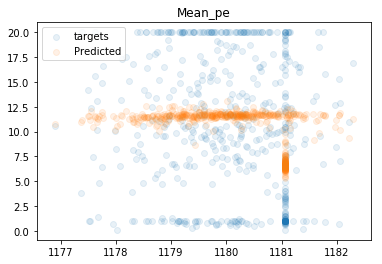

Sigma_pe R2: 0.358 RMSE: 16.5


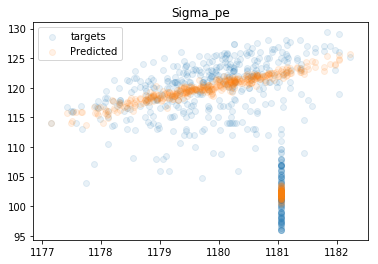

CenterOfMass_pe R2: 0.415 RMSE: 12.0


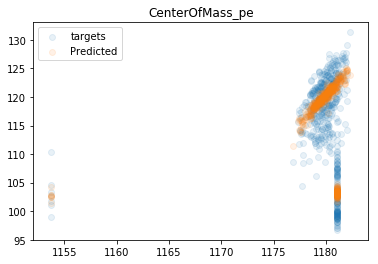

ArgMax_pe R2: 0.184 RMSE: 42.5


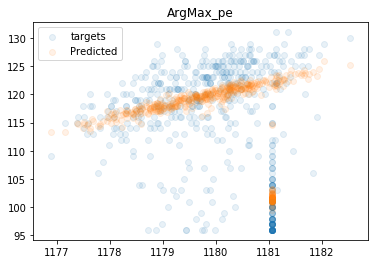

Scaling_pe R2: 0.0925 RMSE: 2.69e+02


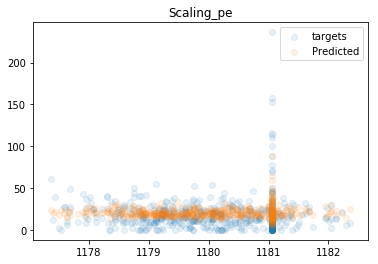

CenterOfMass_it R2: 0.0228 RMSE: 0.898


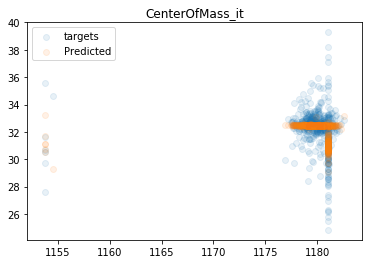

ArgMax_it R2: -0.0108 RMSE: 9.62


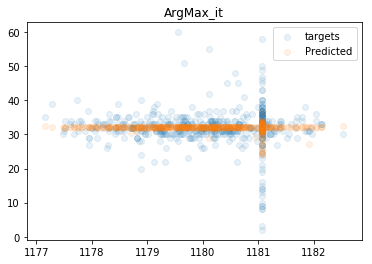

Mean_it R2: 0.765 RMSE: 0.276


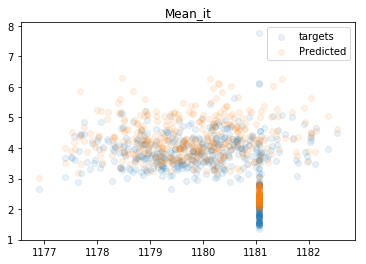

In [26]:
for cur_column in z.columns:
    y=np.asarray(z.loc[:,cur_column].values).astype(float)
    kf = KFold(n_splits=2, shuffle =True)
    r2_scores=[]
    mse_scores=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf =GradientBoostingRegressor()
        clf = clf.fit(X_train, y_train.ravel())
        yhat=clf.predict(X_test)
        r2_scores.append(r2(y_test.ravel(),yhat))
        mse_scores.append(mse(y_test.ravel(),yhat))
    r2_scores=np.asarray(r2_scores)
    mse_scores=np.asarray(mse_scores)
    print('{} R2: {:.3} RMSE: {:.3}'.format(cur_column, (r2_scores).max(),(mse_scores).max()))
    plt.scatter(X_test[0:500,40],y_test[0:500], label='targets', alpha=0.1)
    plt.scatter(X_test[0:500,40], yhat[0:500], label='Predicted',alpha=0.1)
    plt.title(cur_column)
    plt.legend()
    plt.show()
    plt.close()